In [25]:
# from eda_code import *
%run EDA_code.ipynb

# Bitcoin Accumulation Dashboard – Insight Analysis  
### * Demonstrate how the dashboard’s information meaningfully helps investors make better Bitcoin investment decisions.
### * Using dashboard features to evaluate the performance of the Dynamic DCA strategy
The Dynamic DCA strategy adopted in the dashboard, designed by Youssef Ahmed from the Georgia Institute of Technology, has achieved strong performance, with an average SPD percentile of 89.55% and a 99.41% win rate, outperforming uniform DCA. We have successfully integrated this strategy into our dashboard and further enhanced it with additional indicators, such as risk metrics, news sentiment, and the MSTR purchase signal. This allows users to allocate their budget for purchasing Bitcoin using a user-friendly interface, while also using the dashboard features to monitor performance and incorporate other information into their decision-making process.

However, evaluation metrics and numerical indicators alone can still feel somewhat abstract to users, especially beginners. Without understanding the model mechanics and the logic behind the indicators, users may not fully trust the strategy or feel confident using the dashboard features. Therefore, the goal of this analysis notebook is to use various exploratory data analysis methods, including visualizations, aggregated charts, and other comprehensive analyses, to show how well the current Bitcoin accumulation strategy actually performs, how the dashboard features can be used to evaluate the strategy’s decision-making process, and how the information provided by the dashboard can meaningfully help investors make better Bitcoin investment decisions.

---

# 0. Strategy Assumptions
1. Dynamic DCA's focus on Bitcoin accumulation, a buy-only approach (no selling). Its objective is to maximize total Bitcoin accumulation.
2. Dynamic DCA uses a 1-year window as its primary optimization horizon.  
    - Its objective is to maximize total Bitcoin accumulation within a single 1-year window. In other words, an investor using this strategy for one year aims to allocate capital in a way that buys more Bitcoin at relatively lower prices throughout that year, resulting in a higher total BTC balance by the end of the window.
    - This strategy does not guarantee optimal Bitcoin accumulation when the investment horizon is extended (e.g., two years or longer) or shortened, even if the same annual budget is used.
3. Dynamic DCA is designed for a fixed annual Bitcoin investment budget
    - The entire annual budget is fully deployed within each year, and a new, separate budget is reset at the beginning of the next year.

# 1. Daily Allocation Insights  
### How does the dashboard tell investors how much to buy each day? And is this allocation behavior reasonable?

## 1.1 Understanding Daily Allocation Behavior
- **Question answered:**  
**1. What does the daily recommended allocation represent?**  
**2. How does allocation change through time?**

### 1.1.1 Daily Recommended Allocation
The daily recommended allocation represents the percentage of an investor’s fixed budget that the Dynamic DCA strategy suggests deploying on each day. Higher allocations indicate stronger buy signals (typically when BTC is relatively cheap), while lower allocations indicate reduced purchasing during more expensive conditions.

### 1.1.2 What Following the Strategy Looks Like Day-to-Day
The animation shows exactly what following the strategy looks like day-to-day: as prices fall, your daily buy amount gradually increases; as prices rise, it naturally tapers off. You can visually see how your money gets deployed through market cycles.

![til](data/allocation_animation_quarterly.gif)

## 1.2 Allocation vs Price Trend
- **Question answered:**  
**1. Does the dynamic DCA strategy increase allocation when Bitcoin is cheap and reduce allocation when it is expensive?**  
**2. Does the dynamic DCA strategy automatically buy more in downturns and slow down during uptrends?** 
- Approach:
    - BTC Price and Dynamic Allocation under Non-overlapping Rolling Windows (2018–2025)
- Key Findings:
    - Dynamic DCA truly concentrates its allocations at low-price regions in 1-year windows.

First, let’s look at this in the most intuitive way. We want to see whether the core investment strategy shown in the dashboard, the dynamic DCA strategy that tells you how much budget to allocate for buying BTC each day, truly increases allocation when the price is low and decreases allocation when the price is high.  

### 1.2.1 BTC Price and Dynamic DCA Allocation under Non-overlapping 1-year Rolling Windows (2018–2025)
Since the evaluation metric of this model is to maximize the SPD Percentile of a 1-year rolling window, we are essentially asking whether, within each one-year period, the strategy helps you buy as much Bitcoin as possible given a fixed budget. So we then look further at each year from 2018 to 2025 and check whether this strategy consistently increases allocation at local lows and cuts back at local highs.

I created a combined chart that overlays the BTC price line with allocation weight bars. This lets us look more closely at each year from 2018 to 2025 and check whether the strategy consistently increases allocation at local lows and cuts back at local highs.  

Ideally, we should see higher allocation weights when the price is at local lows, lower weights when the price is high, and extra allocation added after sharp drawdowns near the bottom or right before major price rallies.

Between June 2018 and June 2019, the price reached a clear low point around the middle of the year. We can see that the strategy concentrated more allocation during this period, and it also increased the investment weight immediately as the price dropped to its bottom.

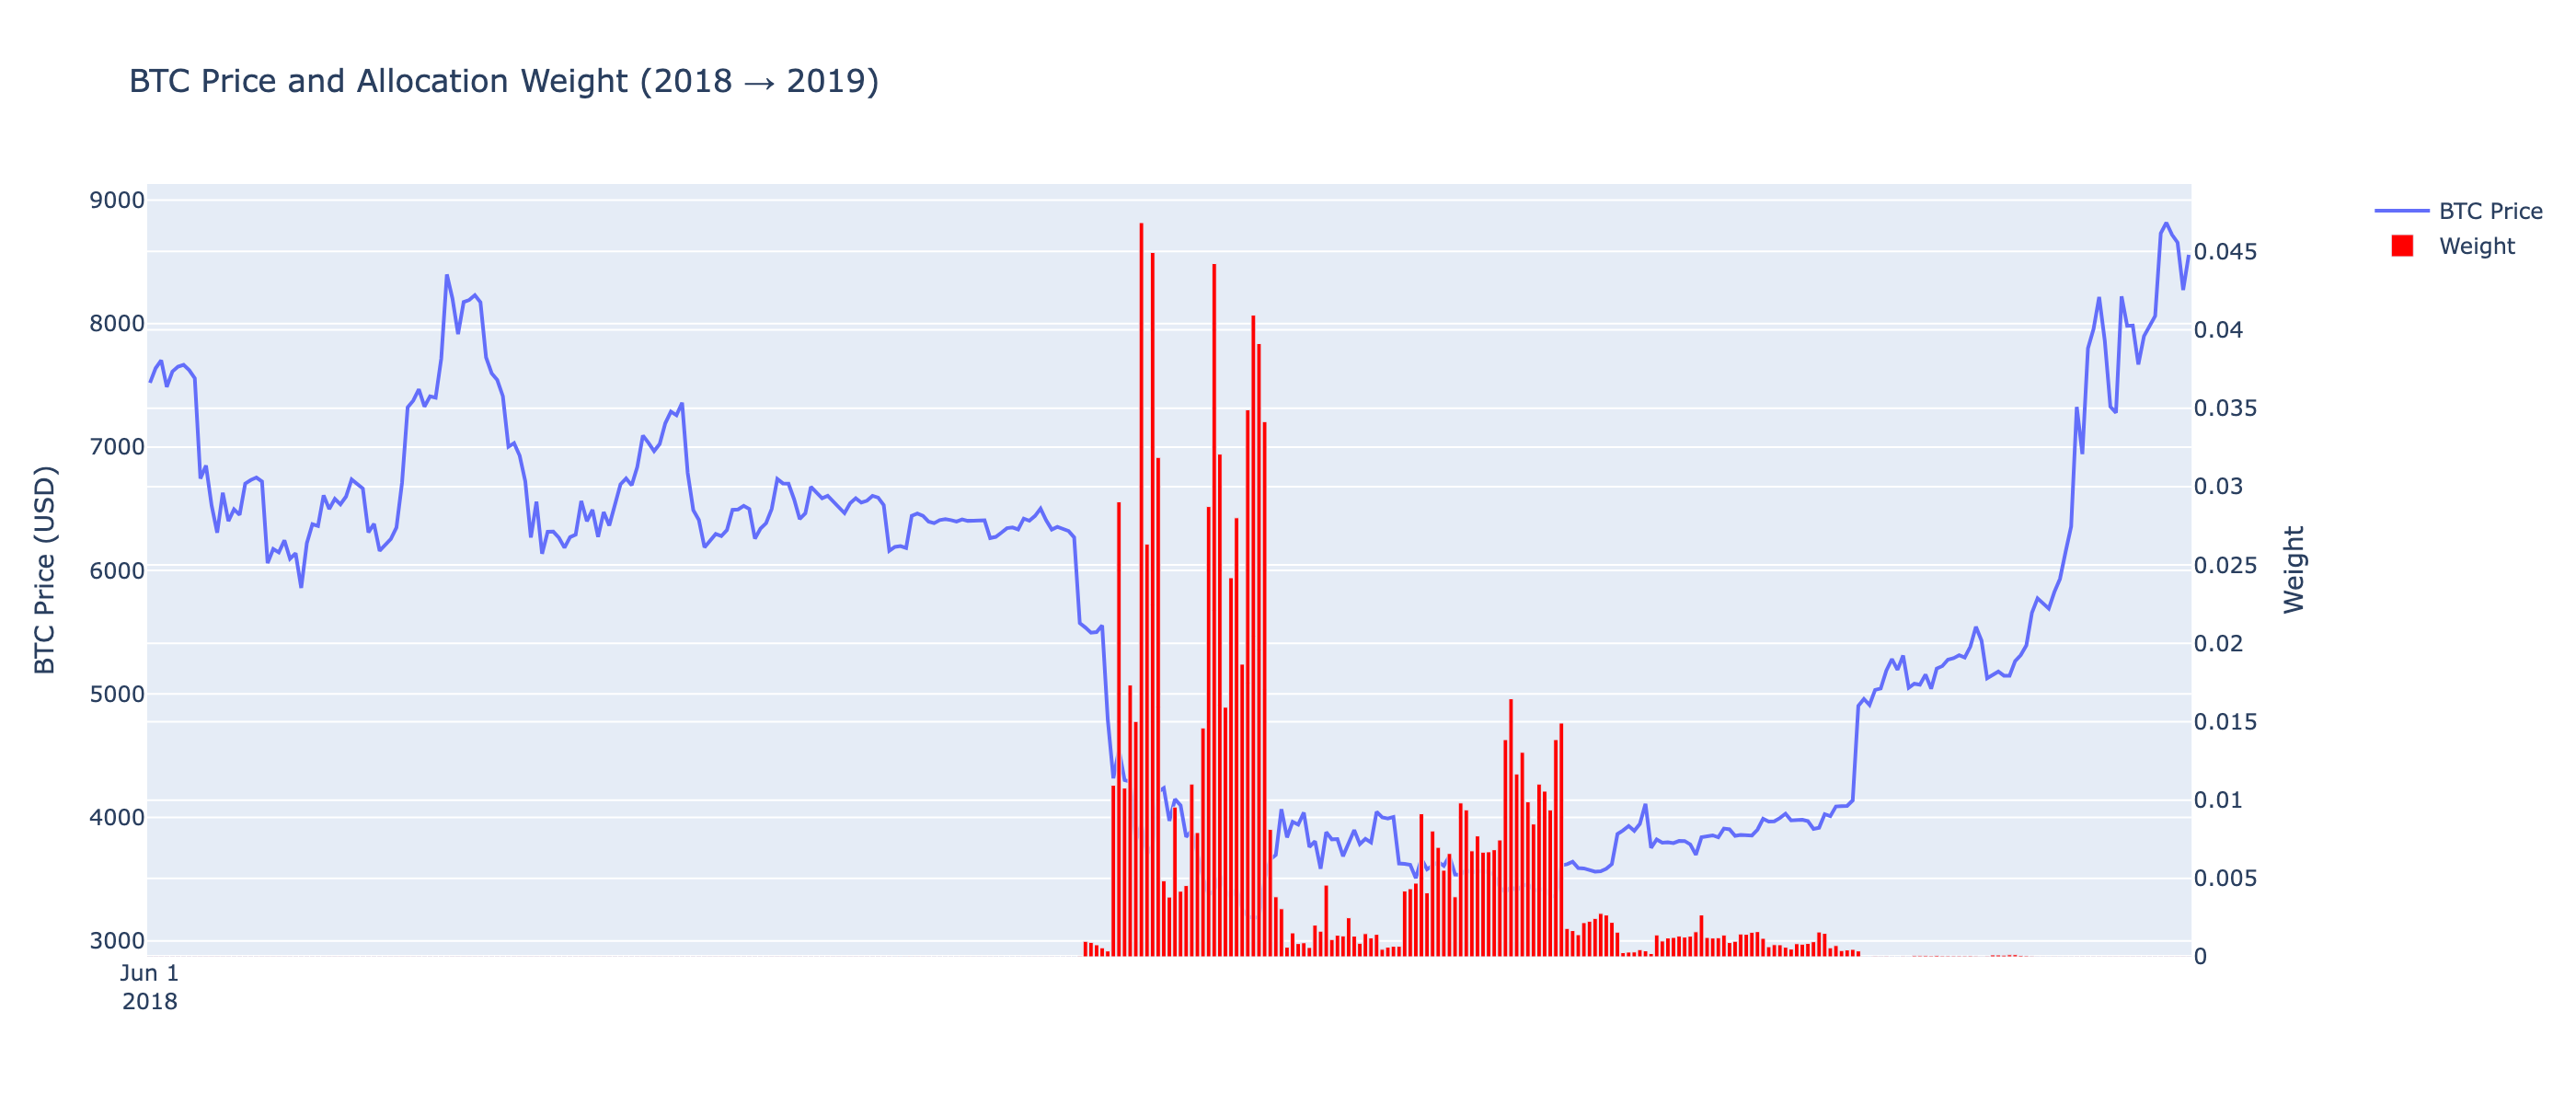

In [7]:
plot_weight_price_by_year(2018)

Between June 2019 and June 2020, the price moved in a more volatile, sideways pattern, without a clearly defined low range. However, we can still observe that the strategy significantly increased its allocation at the historical low point, and did so specifically when the price dropped sharply to that bottom level.

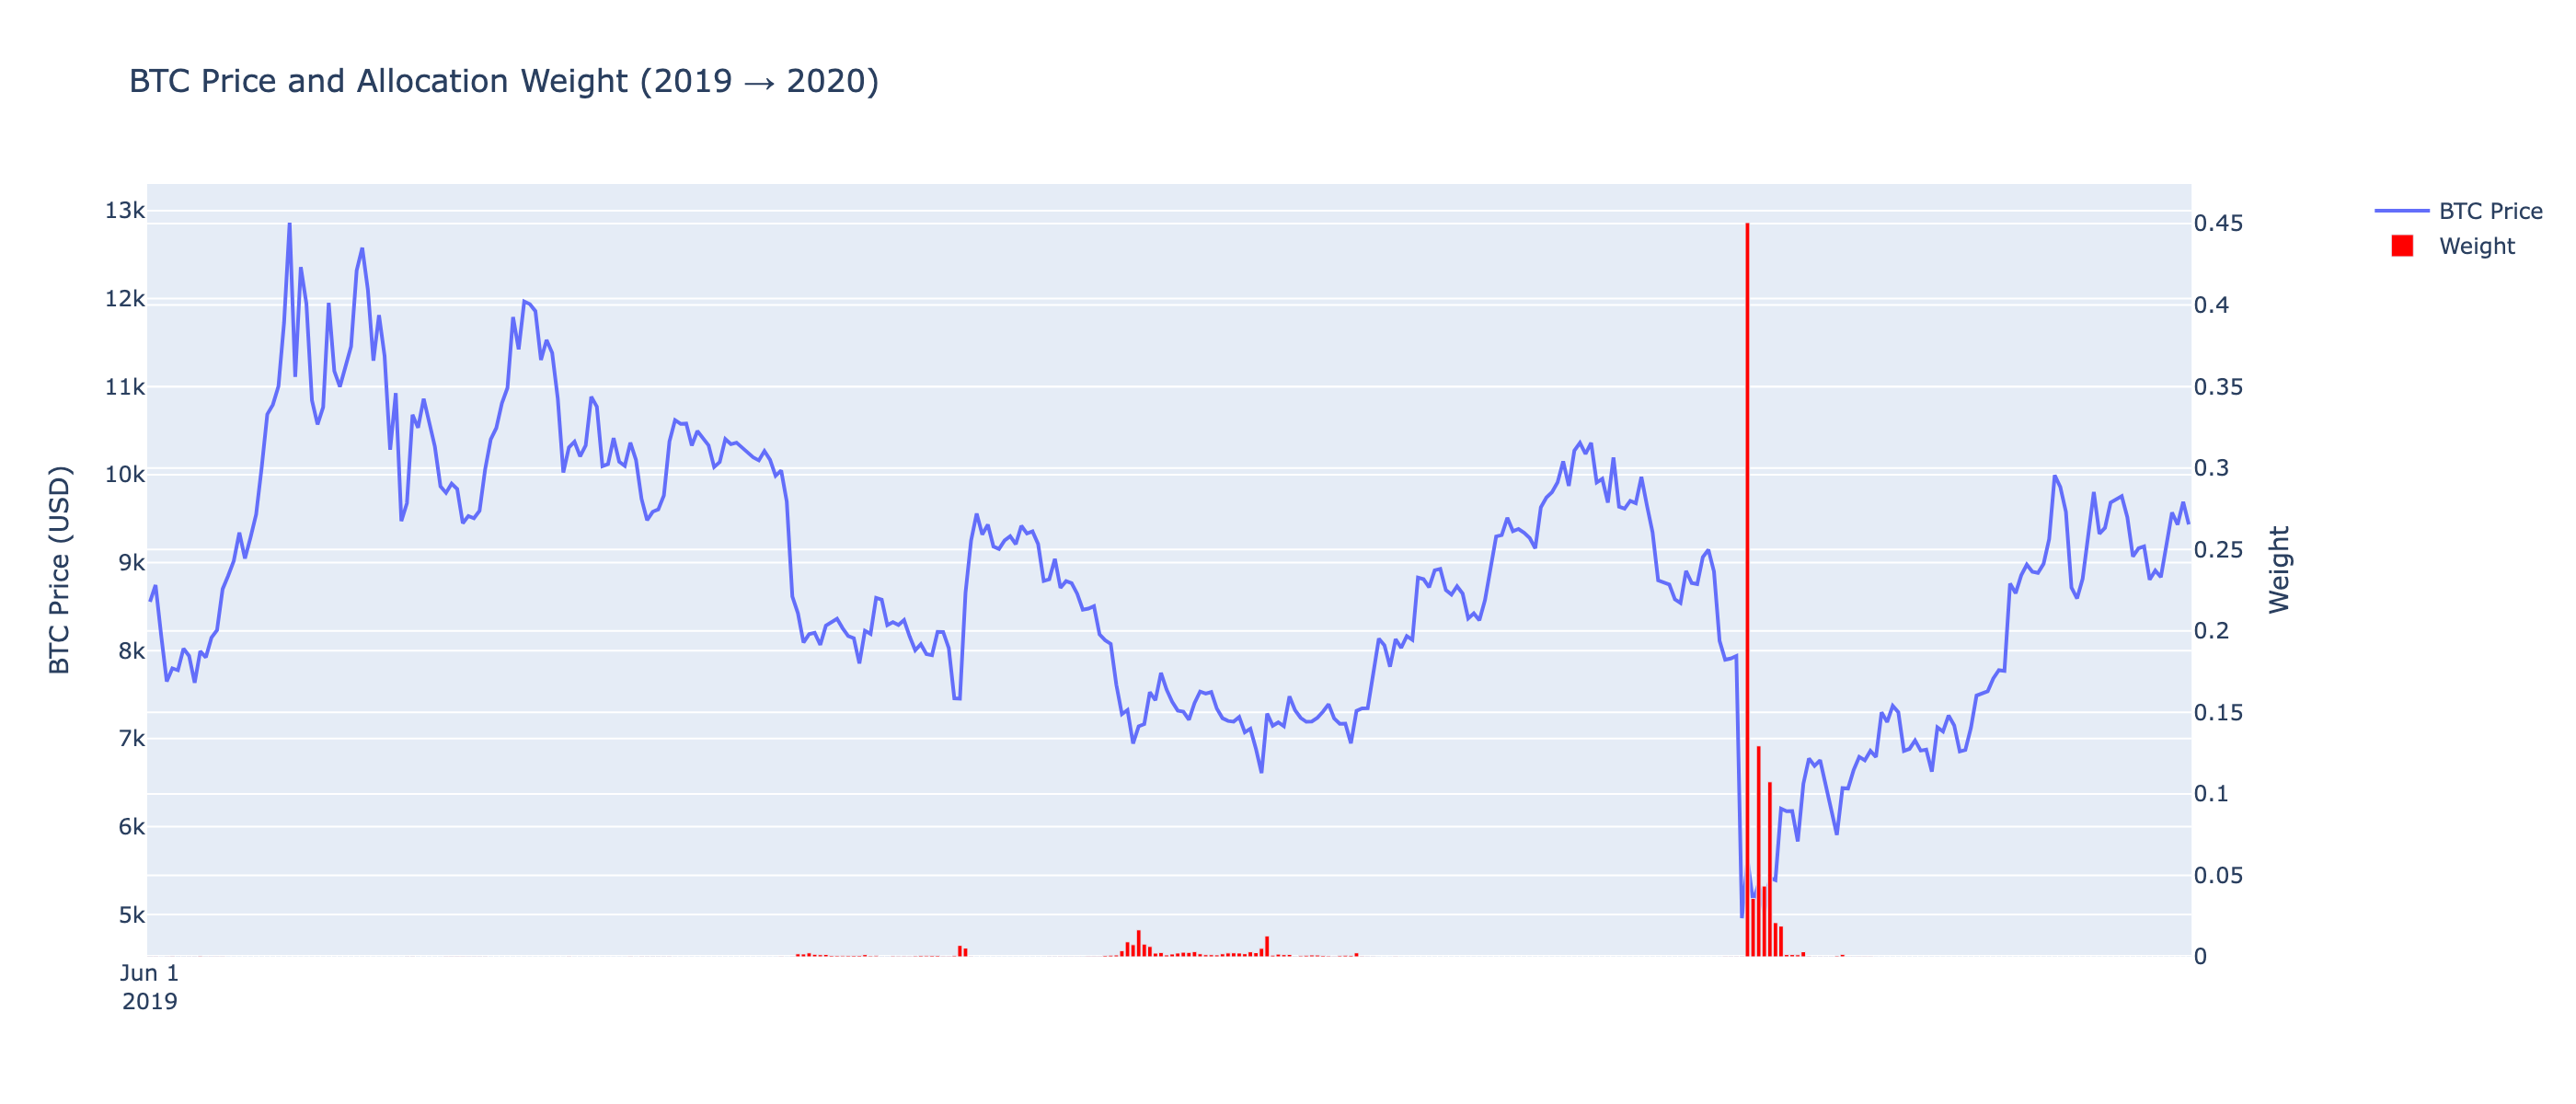

In [8]:
plot_weight_price_by_year(2019, 2020)

Between June 2020 and June 2021, the price trend showed a clear pattern, with a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated more allocation at the beginning of the year.

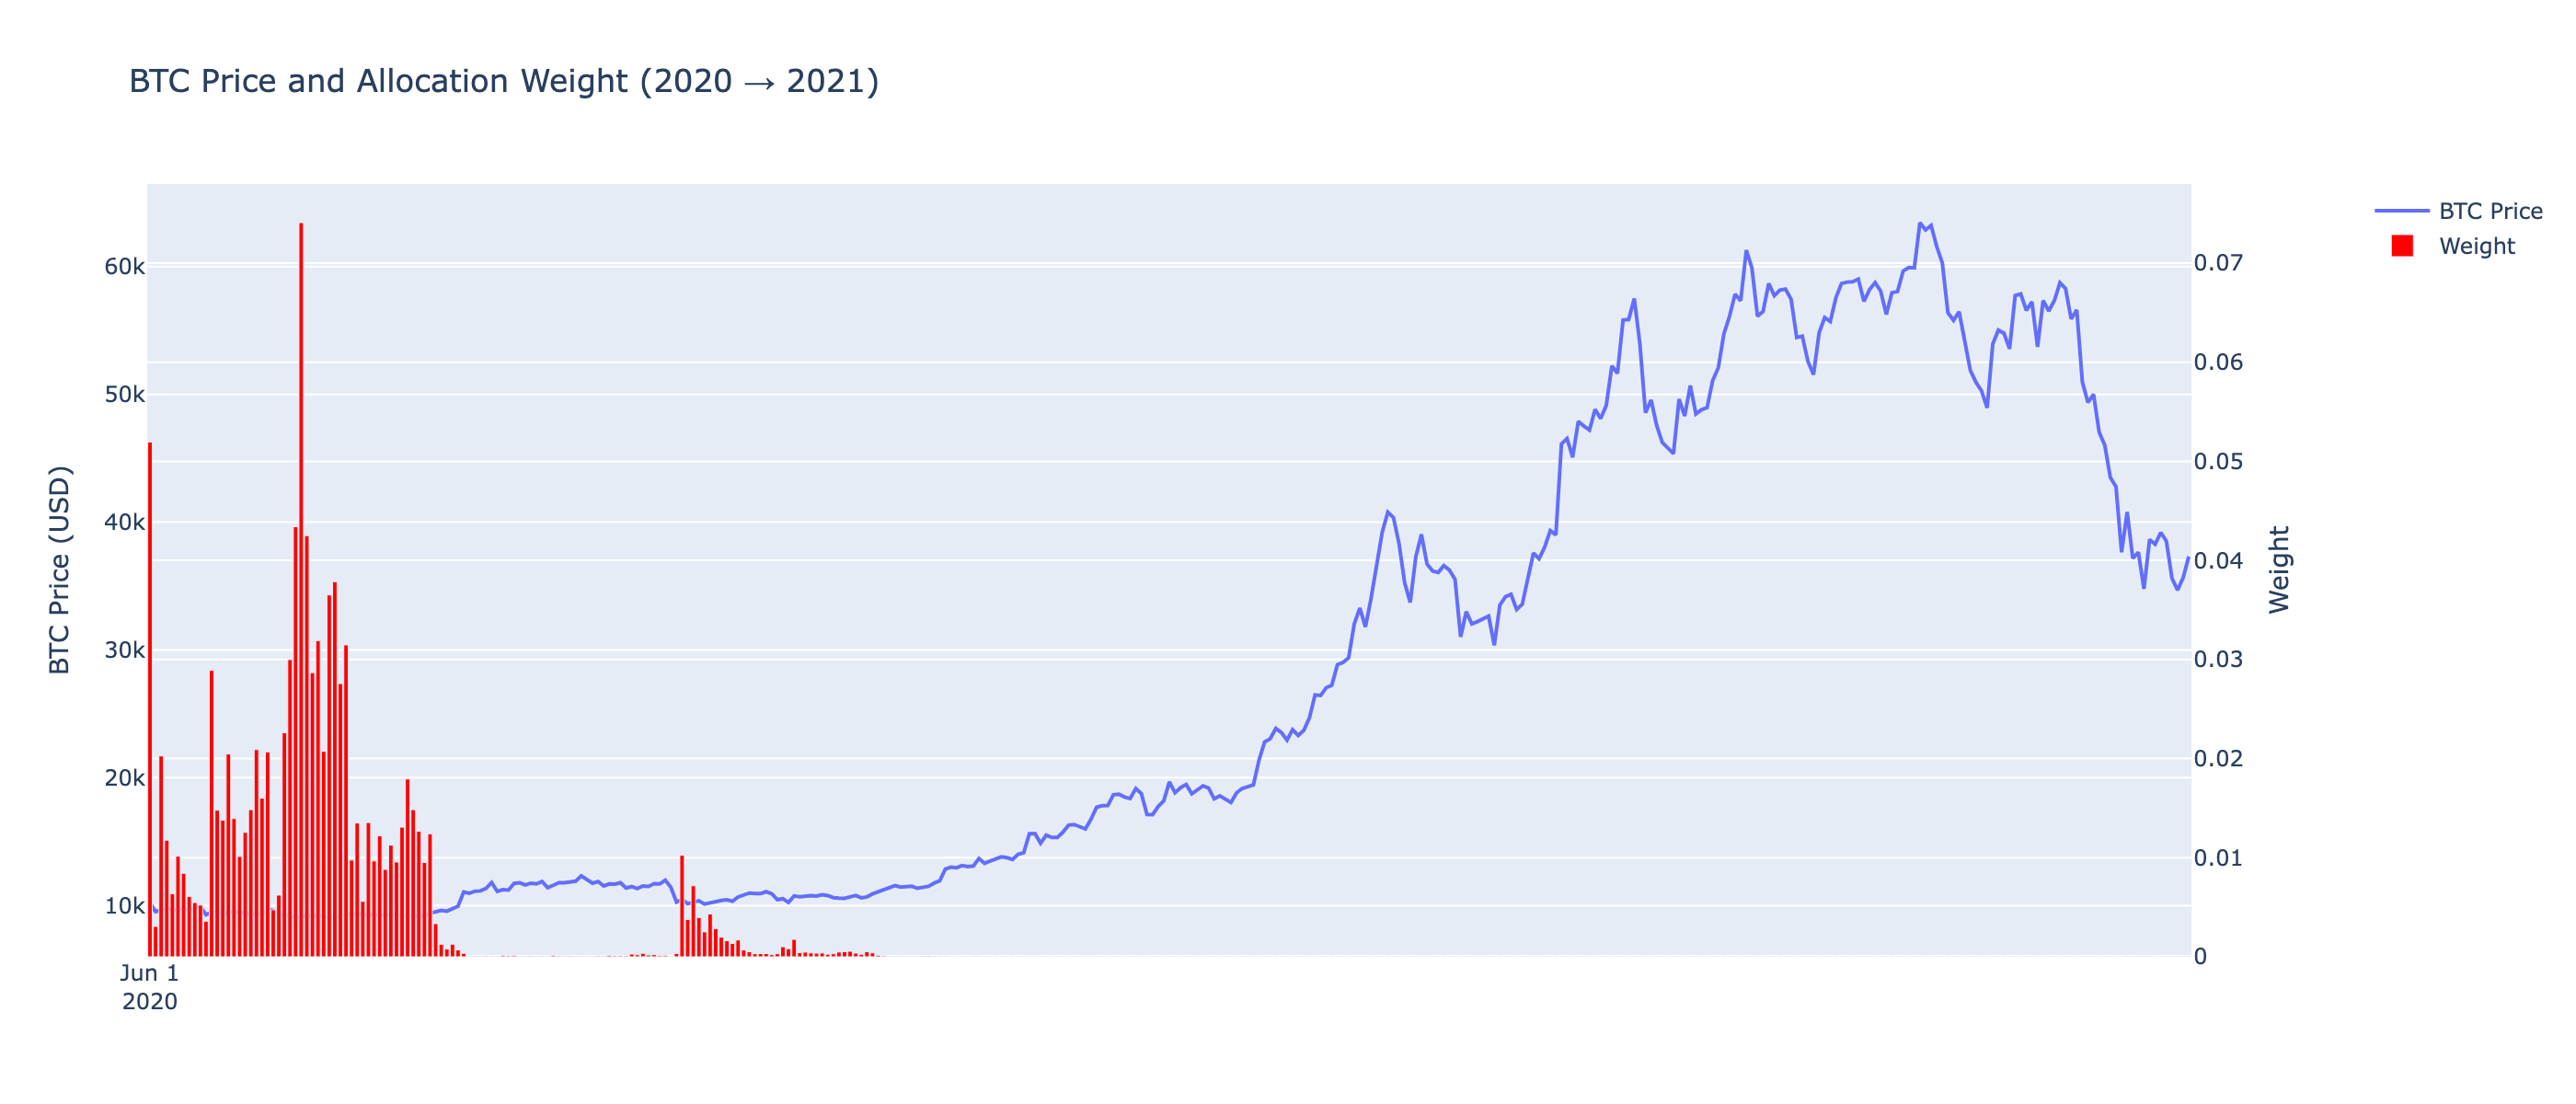

In [9]:
plot_weight_price_by_year(2020, 2021)

Between June 2020 and June 2021, the price trend showed lows at the beginning and end of the year, with a high in the middle of the year. The strategy chose to concentrate more allocation toward the end of the year.

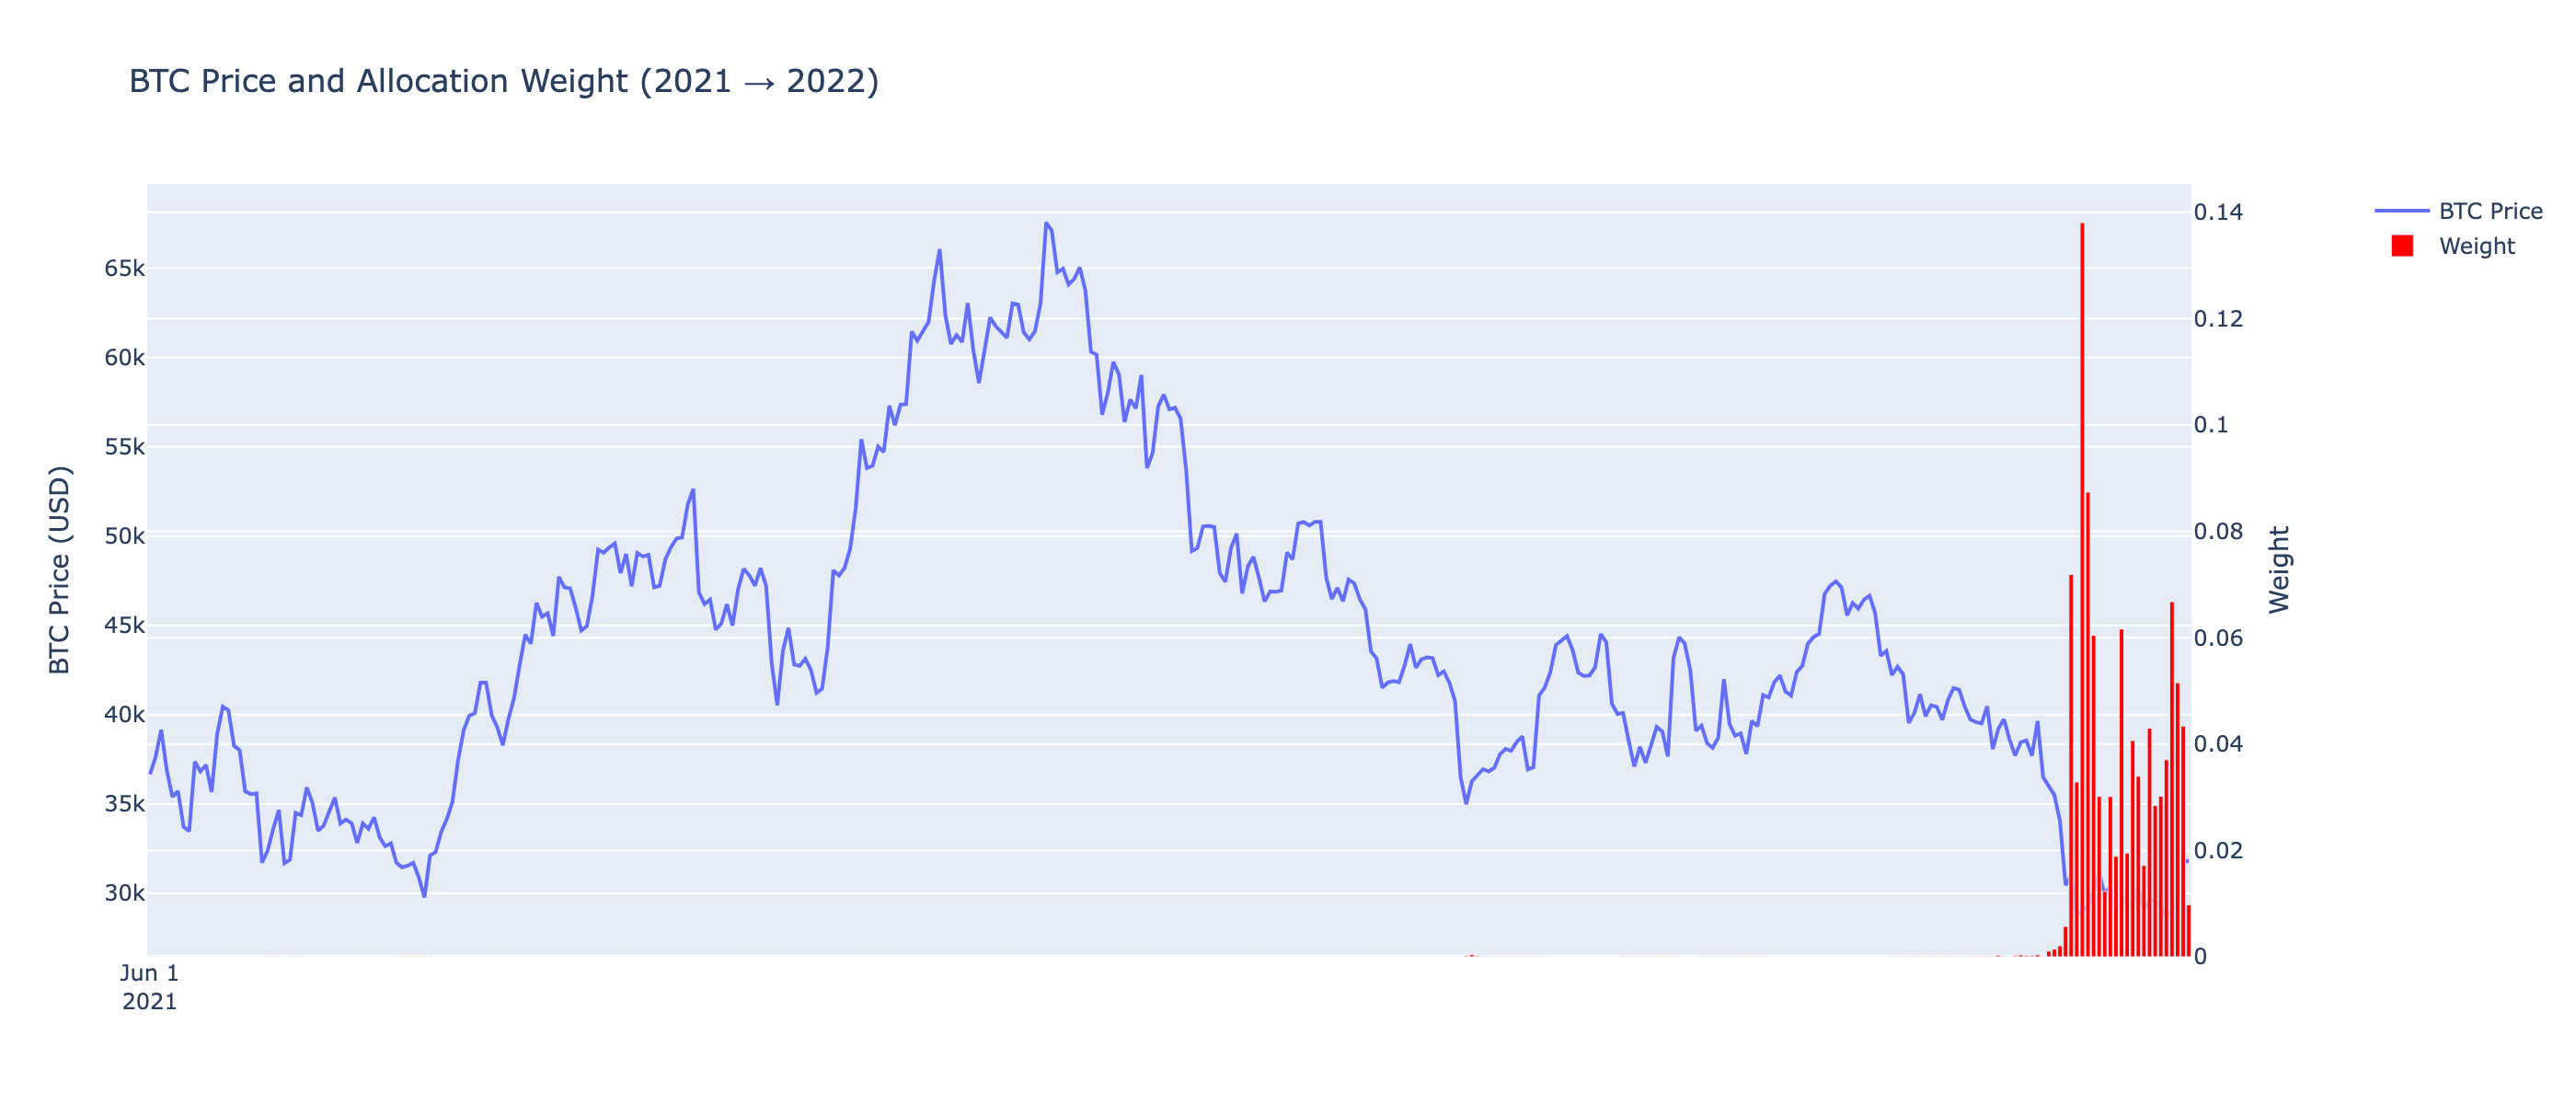

In [10]:
plot_weight_price_by_year(2021, 2022)

Between June 2022 and June 2023, the price trend showed highs at the beginning and end of the year, with a low in the middle. We can see that the strategy concentrated its allocation around the mid-year low. In addition, when there was a sharp drop in price at the beginning of the year, the model chose to increase allocation right after that drawdown.

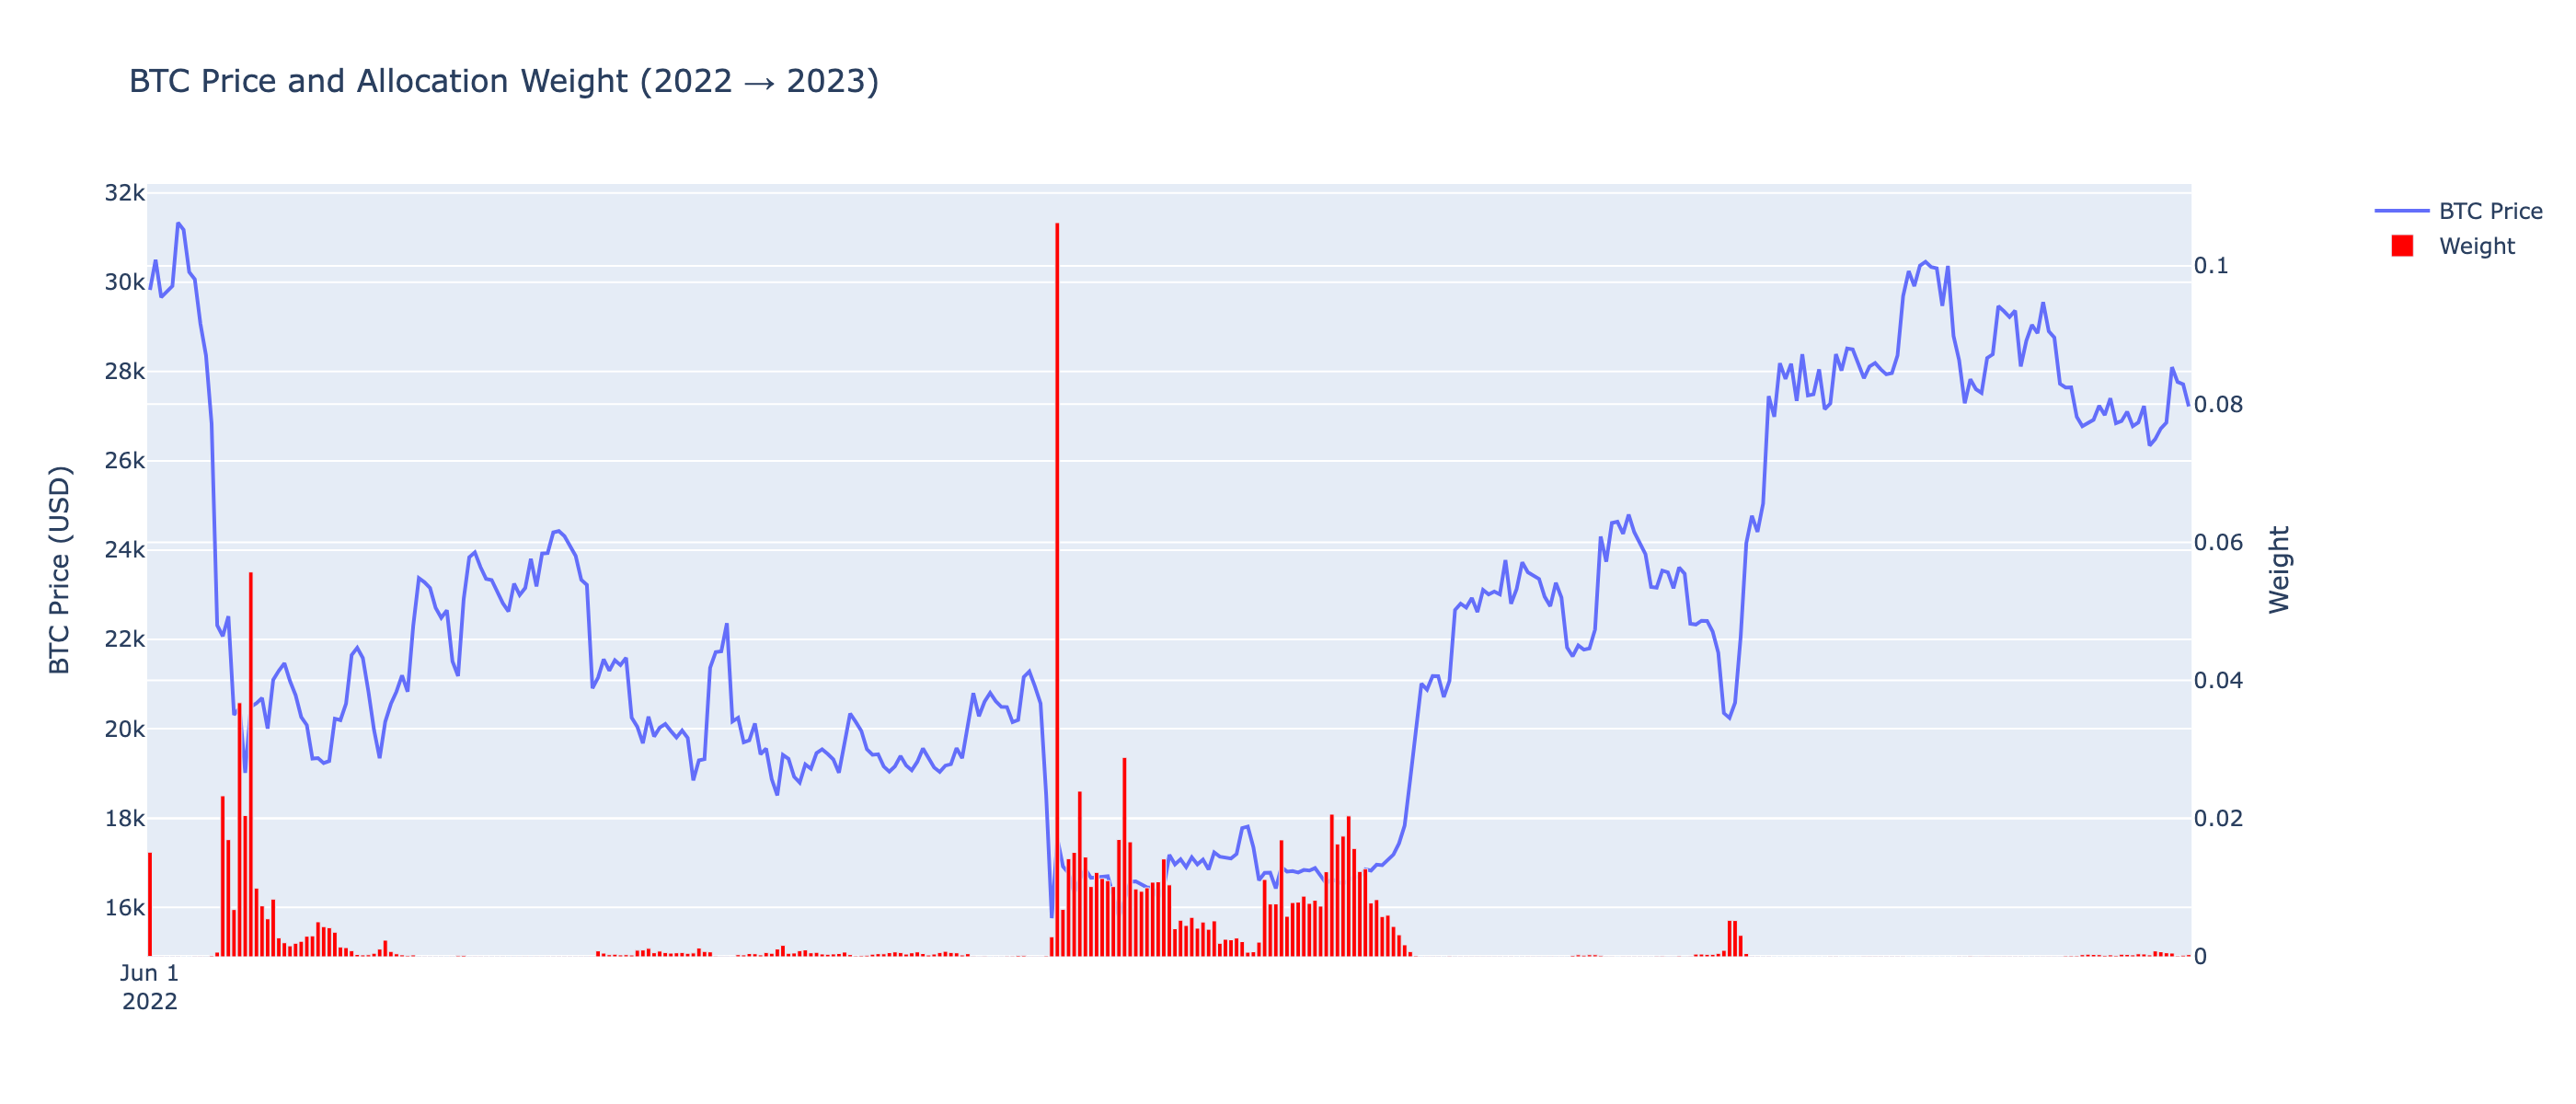

In [11]:
plot_weight_price_by_year(2022, 2023)

Between June 2023 and June 2024, the price trend showed a clear pattern, with a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated its allocation at the beginning of the year, and it increased the weight specifically around those relatively low price points.

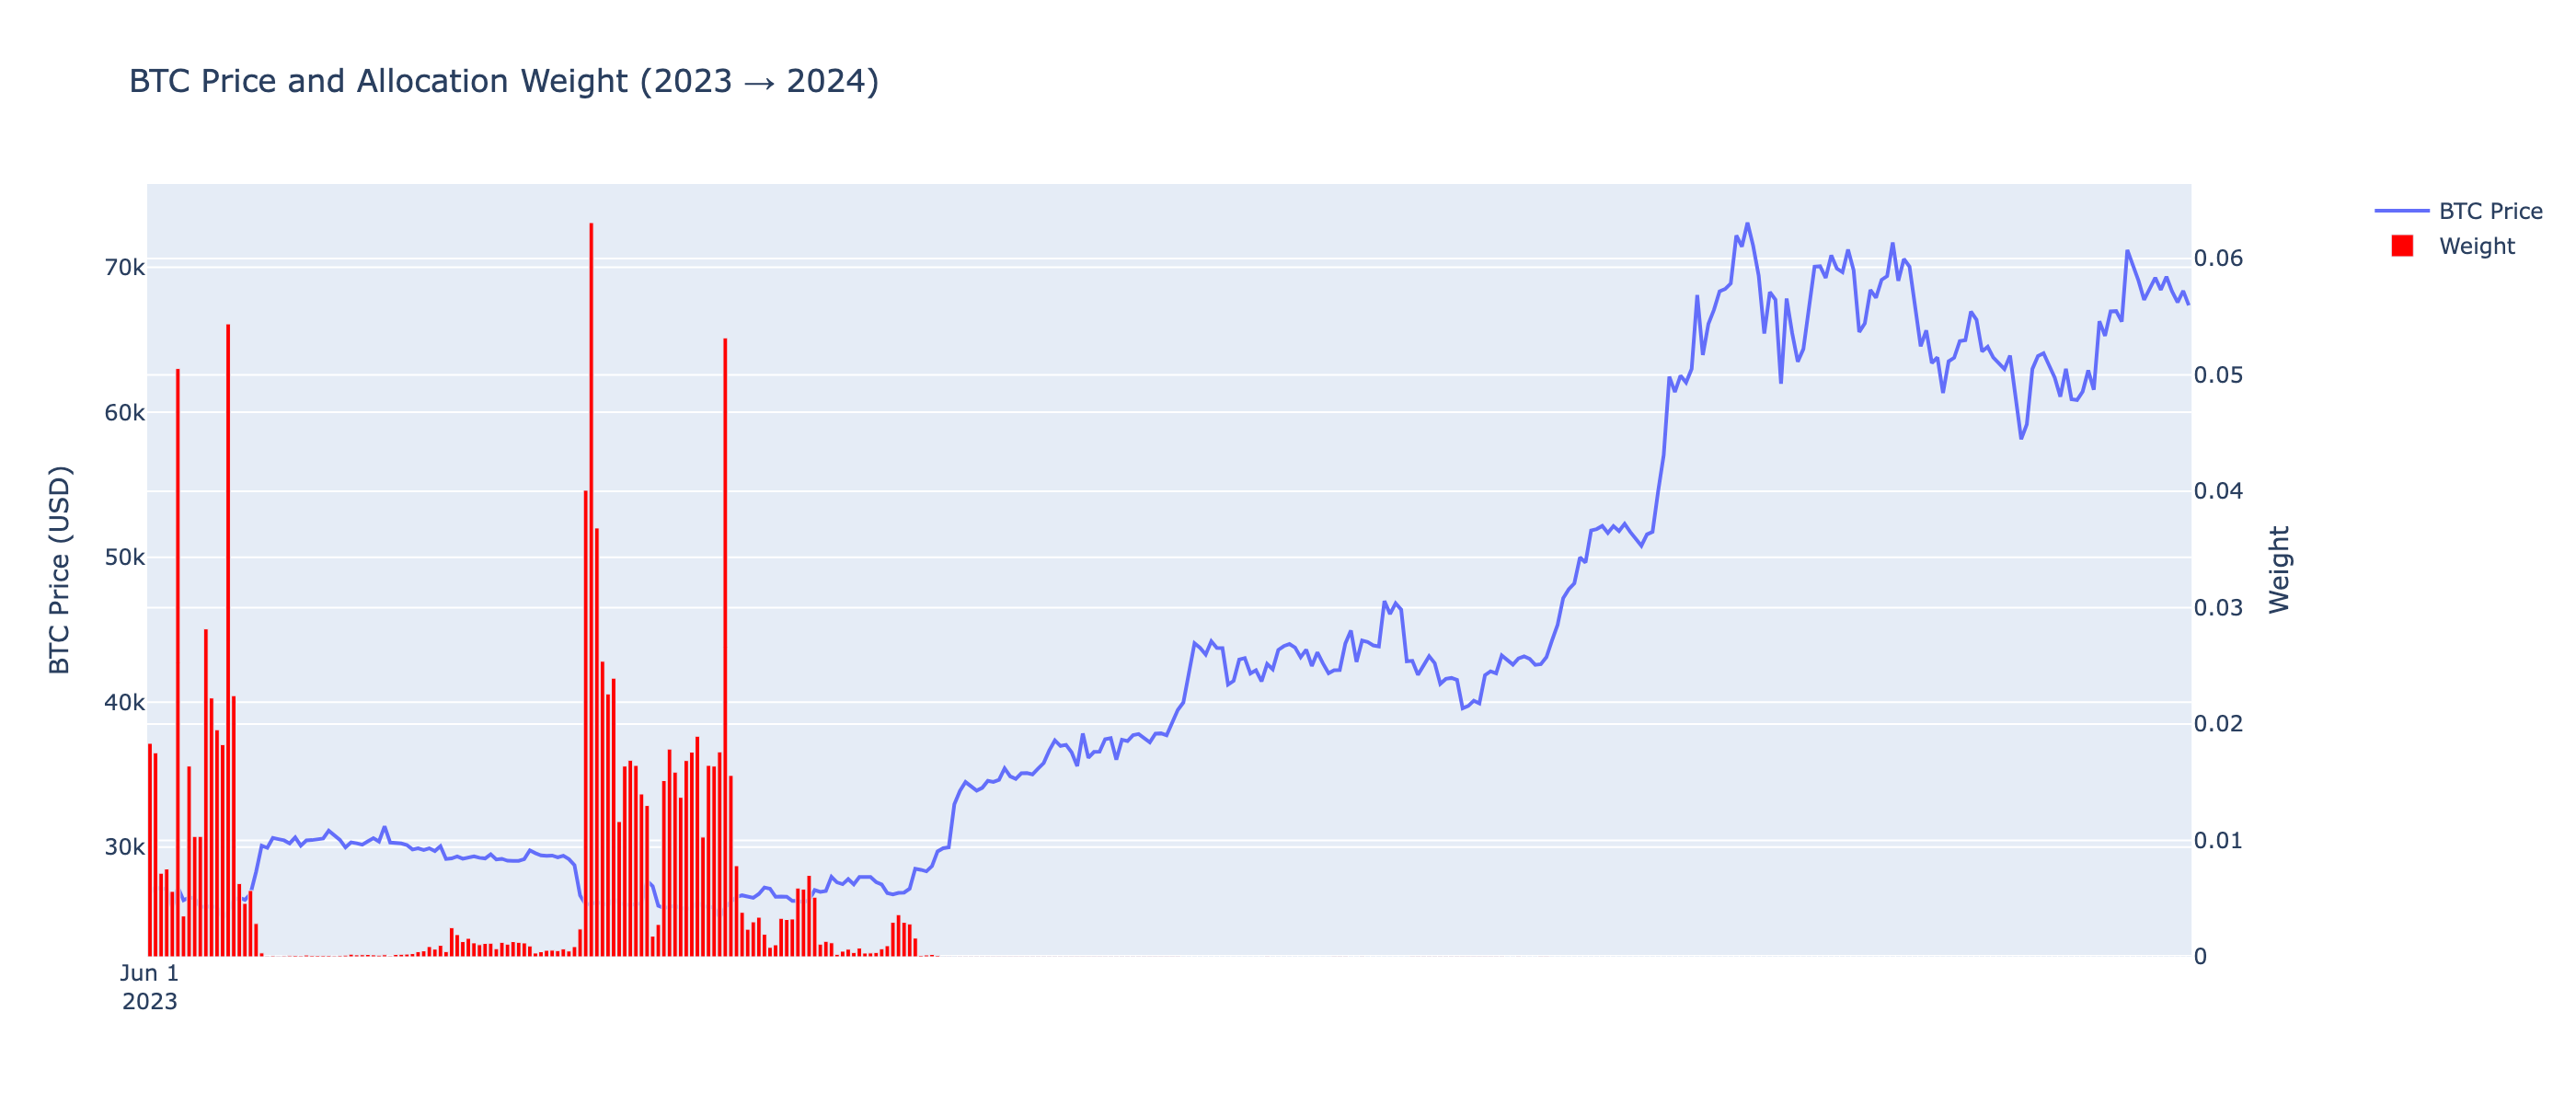

In [12]:
plot_weight_price_by_year(2023, 2024)

Between June 2023 and June 2024, the price trend also generally showed a low at the beginning of the year and a high toward the end of the year. We can see that the strategy concentrated its allocation at the beginning of the year, and increased the weight around those relatively low price levels.

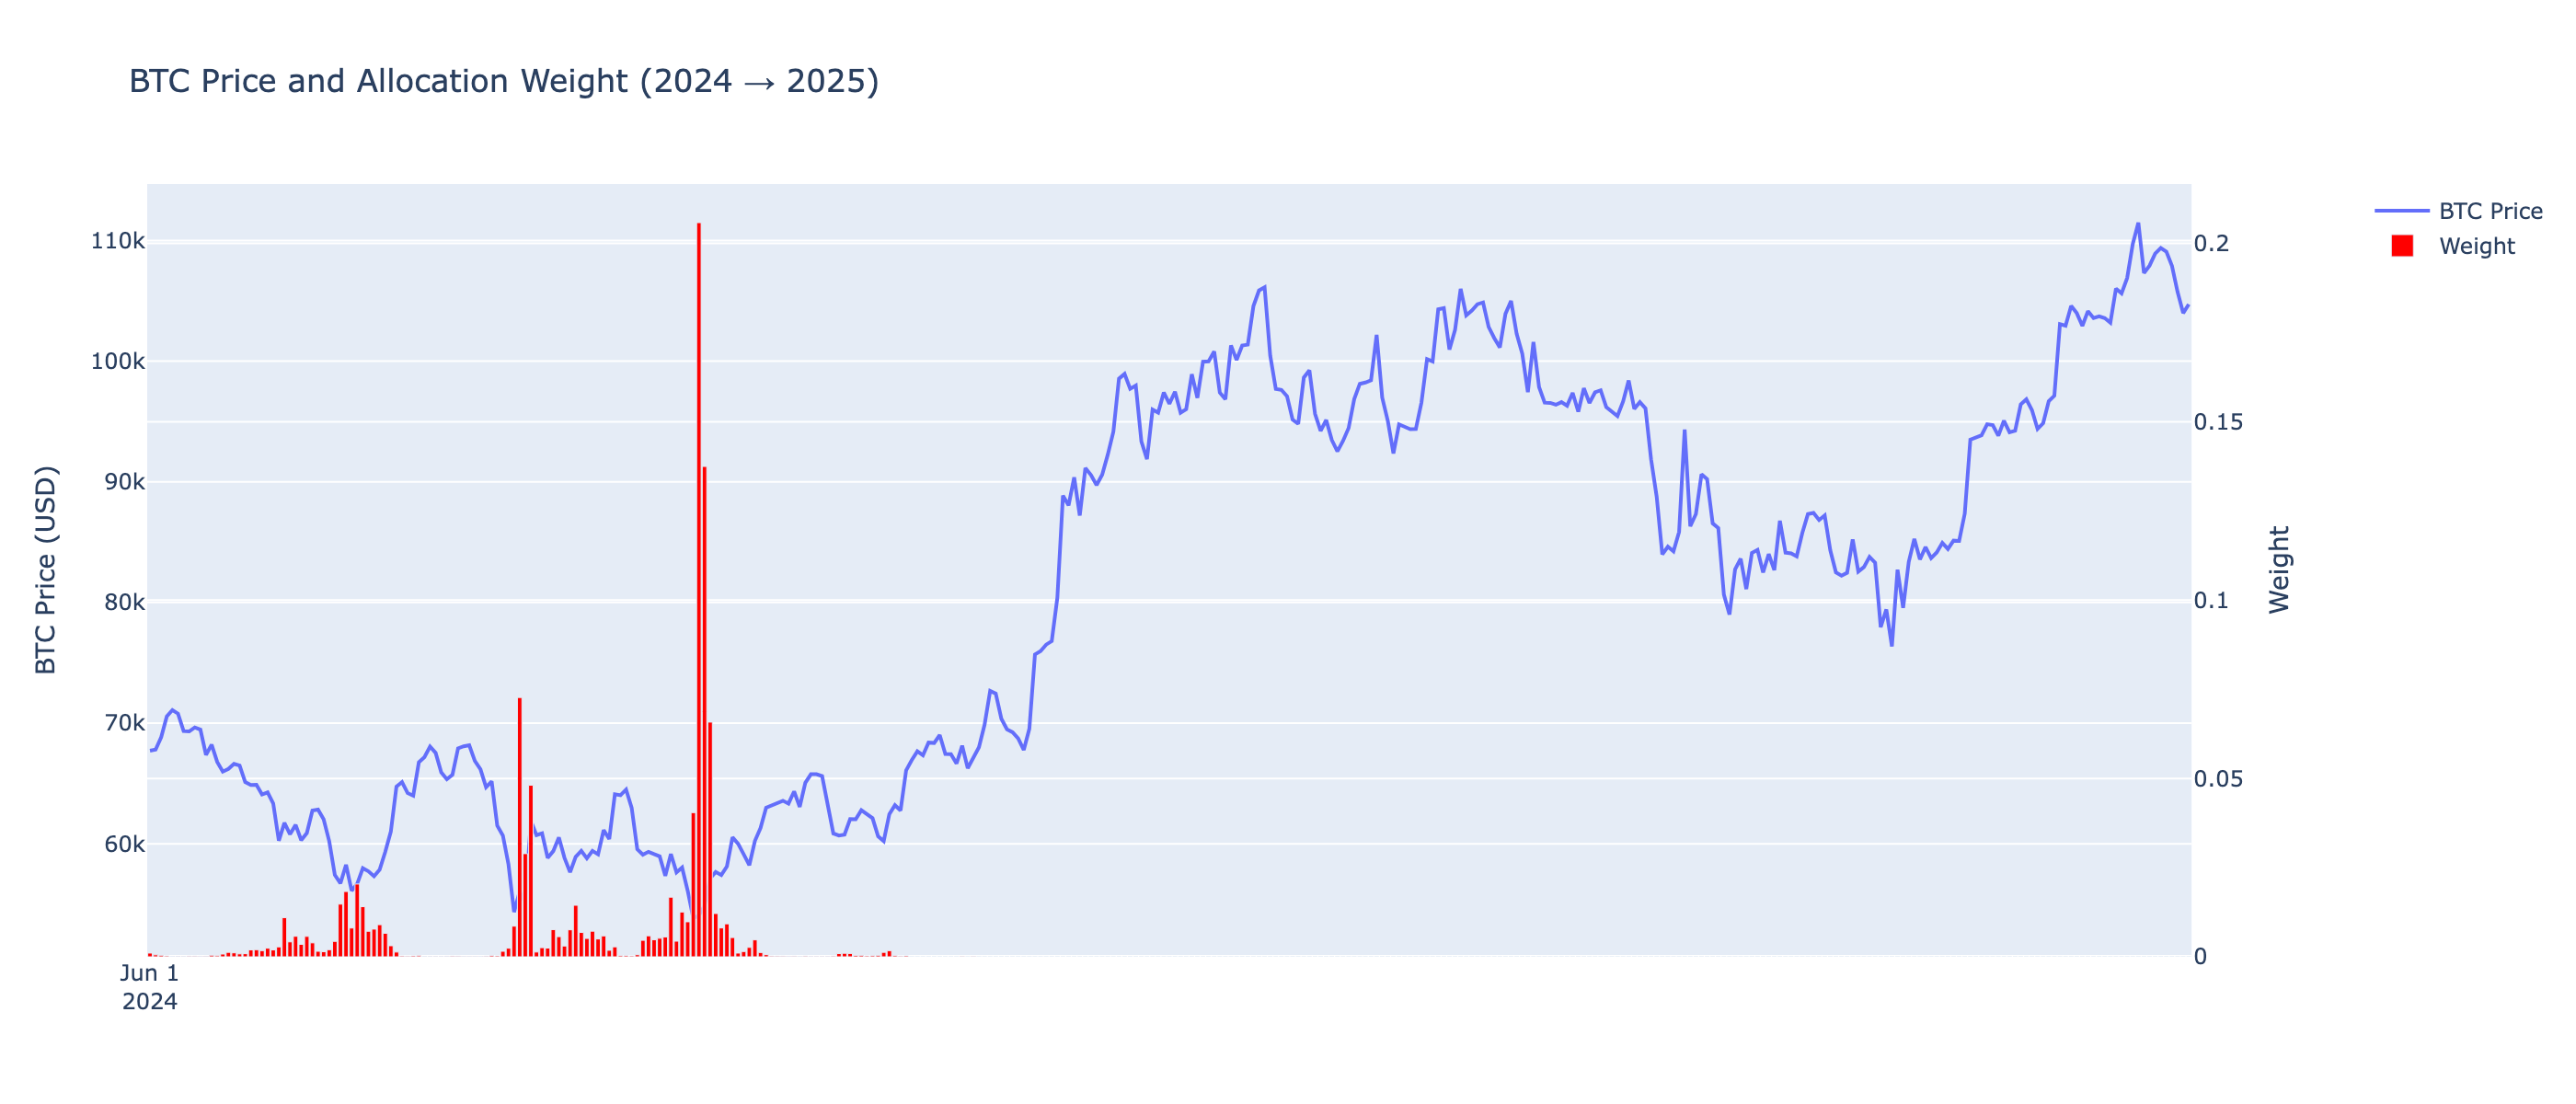

In [13]:
plot_weight_price_by_year(2024, 2025)

## 1.3 Allocation Behavior by Market Regime
- **Question answered:**  
  **How does the dashboard adapt allocation based on market regimes?**  
- Approach:
  - Define Bull / Bear / Sideways regimes using MA200.  
  - Compare mean allocation per regime.
- Key Findings:
  - Dynamic DCA increases buying in weak markets and reduces exposure in strong markets

In this section, we compare the average allocation under different market regimes (bull, bear, and sideways). This helps us understand whether the strategy automatically adjusts its aggressiveness based on the broader market condition. If allocation is higher in bear regimes and lower in bull regimes,
it suggests that the dashboard naturally buys more in weak markets and scales back in strong markets.

- I define a bear regime as days when the price is more than 10% above the 20-day moving average, and a bull regime as days when the price is more than 10% below the 20-day moving average, with the remaining days classified as sideways.
- From the table, we can clearly see that the average allocation is significantly higher in the bear regime than in the sideways and bull regimes, and it is lowest in the bull regime.

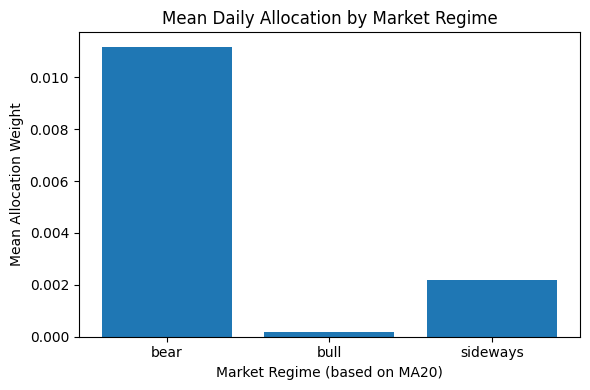

,regime,weight
0,bear,0.011170
1,bull,0.000188
2,sideways,0.002184


In [14]:
plot_allocation_by_regime(buffer = 0.1) 

---

# 2. Investment Efficiency Insights  
### Does the information provided by the dashboard help investors buy more BTC with the same amount of money?

## 2.1 SPD Percentile vs Allocation – Are We Buying Cheap or Expensive?  
- **Question answered:**  
  **Does the dashboard help identify good buying opportunities?**  
- Approach:
  - Visualize distribution of SPD percentile and strategy allocation.
- Key Findings:
  - The DCA strategy allocate more budget when the SPD Percentile is high (relatively cheap) and reduce allocation when the SPD Percentile is low (relatively expensive).

By visualizing the distribution of SPD Percentiles alongside strategy allocation, we can assess whether the strategy is effectively identifying favorable buying opportunities.   

Ideally, this analysis should show a positive relationship between SPD Percentile and allocation. In other words, the strategy should allocate more budget when the SPD Percentile is high (relatively cheap) and reduce allocation when the SPD Percentile is low (relatively expensive).  
* SPD stands for “Spending Power of a Dollar.” It measures how much Bitcoin 1 dollar can buy on a given day. A higher SPD means Bitcoin is relatively cheap (your dollar buys more BTC), and a lower SPD means Bitcoin is relatively expensive.


### 2.1.1 SPD Percentile vs Allocation Weight (Aggregated Across Non-Overlapping 365-Day Windows: 2011–2025)

From this scatter plot, we see a clear positive relationship between SPD Percentile and allocation weight. When the SPD percentile is low, the strategy allocates almost nothing. As the SPD percentile increases, the allocation weight rises, and it increases sharply in the 80–100 percentile range, indicating a strong preference to allocate more when Bitcoin is relatively cheapest.

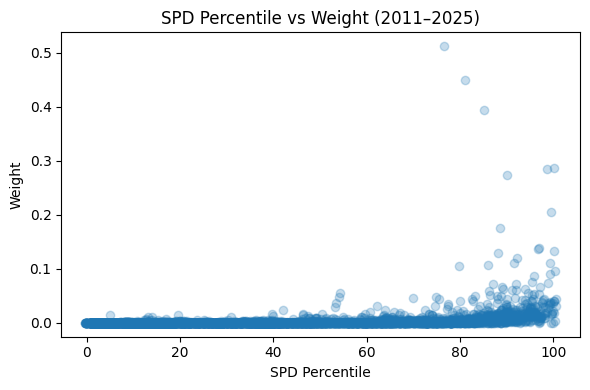

In [15]:
plot_percentile_vs_weight()

This boxplot shows the distribution of allocation weights across different SPD percentile buckets. Both the median and the mean (red dots) increase steadily from the lowest to the highest bucket. In particular, the 80–100 percentile group has by far the highest average weight, and its quartiles are packed very close together, meaning the allocations in this bucket are tightly clustered. This suggests that the strategy not only allocates more when Bitcoin is relatively cheapest, but also behaves more consistently in that cheap range.

/var/folders/dr/_j6dcxqs3zn8h1179k47j1s80000gn/T/ipykernel_75851/1624004424.py:33: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



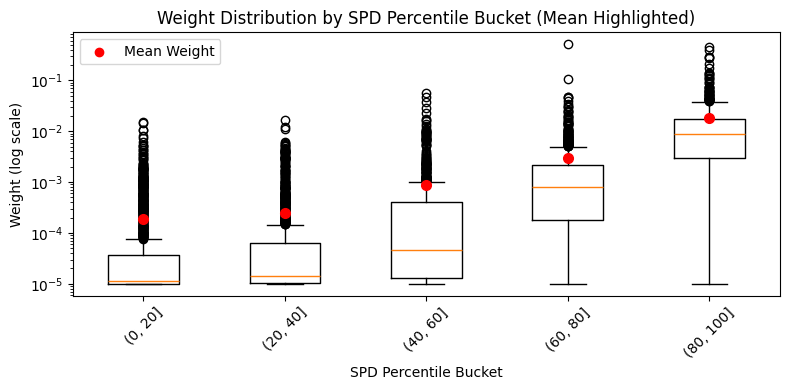

In [16]:
plot_weight_by_spd_bucket()


## 2.2 Simple Returns Win Rate in a yearly window: Dynamic vs Uniform DCA
- **Question answered:**  
  **Is using Dynamic DCA really more likely to achieve higher returns in a yearly window?**  
- Approach:
  - Win rate of annualized return between two strategies across 2011 to 2025
- Key Findings:
  - Dynamic DCA achieves higher simple returns than Uniform DCA in a 1-year window overally.
  - Dynamic DCA grows your portfolio’s asset value more efficiently in a 1-year window.
  - The simple return in a yearly window is directly linked to the total BTC accumulated in that window, since the investment budget is fixed. Therefore, Dynamic DCA accumulates more BTC than Uniform DCA in most yearly windows overall.

I focus on a one-year investment horizon and directly compare the annualized returns of the Dynamic DCA strategy against the traditional Uniform DCA approach. Using rolling 12-month windows from 2011 to 2025, I calculated the annualized return for both strategies in each window. I then compared their performance and computed the win rate of Dynamic DCA — the percentage of one-year periods in which Dynamic DCA outperformed Uniform DCA.  
  
The return is defined as the total portfolio value at the end of the window (total BTC holdings × price at that time) divided by the total budget:
$$
R = \frac{V_T - B}{B}
  = \frac{\text{BTC}_T \cdot P_T - B}{B}
$$

where

- $B$: total budget allocated within the 12-month window (the total amount of money invested)
- $P_T$: Bitcoin price at the end of the window
- $BTC_T$: total amount of Bitcoin accumulated by the end of the window
- $V_T = BTC_T \cdot P_T$: total portfolio value at the end of the window


- The backtest shows that from 2011 to 2025, Dynamic DCA delivered higher annual returns than Uniform DCA in about 98% of the yearly windows.

In [17]:
win_table, rolling_ret_df = dynamic_vs_uniform_return_by_window()
win_table

,win_rate_dynamic_%
Annual Return,98.72


## 2.3 Investment Efficiency: Dynamic vs Uniform DCA
- **Question answered:**  
**Which strategy uses capital more efficiently to accumulate Bitcoin over time?**
- Approach:
    - Calculate the evaluation metric:
        1. Total BTC Accumulation: The total amount of Bitcoin accumulated over time given a fixed investment budget.
        2. Weighted Avg SPD (Satoshis per Dollar): The average amount of satoshis acquired per dollar invested, weighted by the actual allocation.
        3. Effective Avg Purchase Price ($/BTC): The average price paid per Bitcoin, calculated as total investment divided by total BTC accumulated.
        4. Timing Efficiency: The percentage of capital allocated during historically cheap price periods (e.g., bottom 30% percentile).
- Key Findings:
    - With the same investment budget, Dynamic DCA accumulates significantly more Bitcoin at nearly half the average cost, primarily by allocating almost all capital to historically cheapest market conditions.

In [18]:
compare_dynamic_vs_uniform_efficiency()

,Dynamic DCA,Uniform DCA
Total BTC Accumulation,370.4,199.7
Weighted Avg SPD (sats per $),3703658.2,1996656.2
Effective Avg Purchase Price ($/BTC),27.0,50.1
Timing Efficiency (% capital in top 30%),97.3,58.2


# 3. Risk Awareness & Stability  
### Does the dashboard help investors better understand the risks?

## 3.1 Summary of Risk Metrics  
- **Question answered:**  
  **What is the risk profile of the dashboard’s allocation approach?**
- Approach:
  - Compare risk metrics (Sharpe, Volatility) between Dynamic and Uniform DCA across 1-year rolling windows from 2011-2025
  - Explore the reason why Dynamic DCA underperform Uniform DCA in the risk metrics
- Key Findings:
  - Dynamic DCA has bad performance on risk metrics
  - Because Dynamic DCA concentrates its allocations in low-price regions, it naturally exhibits high volatility and a lower Sharpe ratio.

- When comparing strategies, return alone is not enough. We also care about the stability and risk profile of those returns. These are some of the most classic and widely used risk metrics in investing and portfolio analysis. That’s why we look at four risk metrics: 
  1. Sharpe
    - Tells us how much return we earn for each unit of overall risk.
    - Measures risk-adjusted return using total volatility.
    - Higher is better.
  2. Sortino
    - Focuses only on “bad” volatility (downside moves), which is closer to how investors actually feel losses.
    - Measures risk-adjusted return using only downside volatility.
    - Higher is better.
  3. Max Drawdown 
    - Captures the worst peak-to-trough loss, showing the worst loss an investor would have experienced.
    - Lower absolute value is better.
    - Important for judging emotional and financial survivability.
  4. Volatility
    - Measures how much the price fluctuates over time.
    - Higher volatility means more uncertainty and risk.
    - Lower is better.
- Uniform DCA is used as a benchmark to compare the dynamic strategy’s risk.

### 3.1.1 Risk Profile Comparison: Dynamic vs Uniform DCA

See the risk profile of the Dynamic DCA strategy over one-year to long-term horizon:
1. Risk faced by long-term investors: evaluate the risk metrics of the Dynamic DCA strategy over the 2011–2025 period to capture the risk profile for long-term investors.
2. Risk for one-year investment: calculate rolling one-year risk metrics to see how the strategy behaves across different starting dates and to evaluate its stability over time.

Use uniform DCA — the most basic and common investment method for non-professional investors — as a benchmark to see whether our high-performance Dynamic DCA strategy also delivers better risk management than this conservative, steady approach.

In this analysis, we define the “daily return” for the Sharpe ratio using ΔBTC, the change in accumulated Bitcoin between consecutive days:

$$ \Delta\text{BTC}_t = \text{BTC}_t - \text{BTC}_{t-1}.$$

- Why use ΔBTC as the return input?
   1. **Objective alignment**  
      The strategy’s objective is to maximize Bitcoin accumulation, not USD portfolio value. A natural notion of “daily performance” is therefore:  
      How much additional BTC did we accumulate today compared to yesterday?

   2. **Avoiding price-dominated signals**  
      If we instead use USD-based returns, e.g.
      $$
      r_t^{\text{USD}} = \frac{V_t - V_{t-1}}{V_{t-1}},
      \quad V_t = \text{BTC}_t \cdot P_t,
      $$
      the signal is dominated by Bitcoin price movements rather than the allocation logic. BTC price can go up and make USD returns look good even on days when the strategy barely buys anything. In other words, price swings do not actually reflect the performance of BTC accumulation. This is not a meaningful way to evaluate an allocation algorithm.

- Under this definition, the Sharpe ratio can be interpreted as:
   - **Return** ≈ how much BTC the strategy accumulates on average per day;
   - **Volatility** ≈ how uneven or concentrated the timing of BTC purchases is.

- Not use the Sortino ratio:  
The Sortino ratio requires downside returns — values below 0 — because it measures return per unit of downside risk.  
However, $\Delta \text{BTC}_t \ge 0$ by construction: the strategy only accumulates BTC and never sells, so there are no negative “returns” in this metric. Without downside observations, the Sortino ratio is not well-defined or informative in this setting.


After computing risk metrics (Sharpe, annualized volatility) for all 1-year rolling windows from 2011 to 2025, I find that Dynamic DCA never beats Uniform DCA on Sharpe or volatility in any single window.  
In addition, when I aggregate across windows and compute the same risk metrics over the full 2011–2025 sample, Dynamic DCA also underperforms Uniform DCA on every risk metric.

In [19]:
metrics_df, win_rate_table = rolling_12m_risk_metrics_by_window()
win_rate_table

,win_rate_dynamic_%
sharpe,0.0
volatility_annual,0.0


In [20]:
df_portfolio, risk_metrics = build_portfolio_and_risk_metrics_full_history()
risk_metrics

,sharpe,volatility_annual
Dynamic DCA,1.3226,192.6488
Uniform DCA,5.3636,25.6053


### 3.1.2 Why Dynamic DCA Performs Worse on Sharpe/Volatility Metrics

From both the table and the distribution plot, we can clearly see why Dynamic DCA performs poorly under Sharpe-style risk metrics, even though it wins almost all windows in annual BTC accumulation.

1. **Dynamic DCA Wins on Return but Loses on Risk**    
    - From the table, Dynamic DCA achieves a higher annual return in almost every 1-year rolling window. However, its volatility is also consistently much higher than Uniform DCA.  
    - This means: Dynamic DCA accumulates more BTC, but it does so in a highly concentrated and uneven manner.

2. **The ΔBTC Distribution Explains the Behavior**.     
    - From the ΔBTC distribution plot: Dynamic DCA has many days with ΔBTC = 0 (no purchase). But when it buys, it often produces very large spikes in ΔBTC. Uniform DCA shows a stable, tight distribution (same buy amount every day).  
    - This reflects the core nature of the strategy: Dynamic DCA concentrates purchases on low-price days (heavy conviction at bottoms) while ignoring most other days.

3. **High Concentration = Extremely High Variance**
    - Because Dynamic DCA makes rare but very large allocations, its ΔBTC series becomes extremely “spiky”. This creates very large variance, even if the mean return is slightly higher.

4. **Sharpe Ratio Gets Crushed**
    - Sharpe Ratio = (mean return) / (standard deviation of return)
    - Dynamic DCA suffers because: Mean return ↑ slightly (boosted by huge low-price buys) Standard deviation ↑↑↑ massively (due to rare extreme purchases)
    - The denominator (volatility) dominates Sharpe becomes very small or even 0, despite the fact that Dynamic DCA actually performs better at accumulating BTC.

In [26]:
metrics_df, win_rate_table = rolling_12m_mean_vol_returns_by_window()
win_rate_table

,win_rate_dynamic_%
return_annual,97.72
volatility_annual,0.00


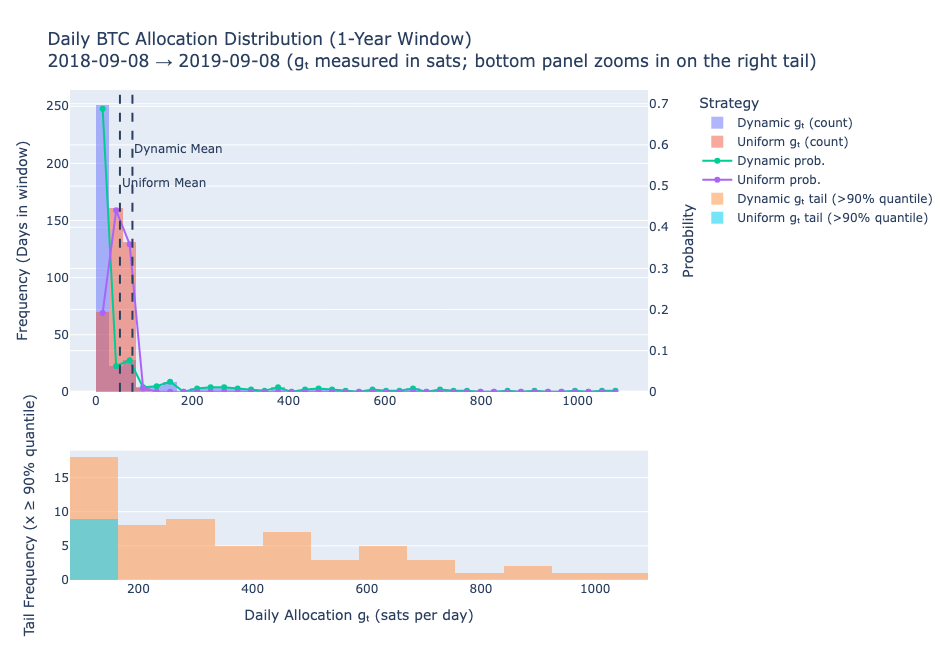

In [22]:
plot_gt_distribution_with_tail_plotly(window_id=100, tail_q=0.9)

## 3.2 Allocation Response to Risk  
- **Question answered:**  
  **Even with high volatility, can Dynamic DCA reliably concentrate purchases at true price lows, rather than mistakenly overweighting at market highs?**
- Approach:
  - Calculate average allocation weight across all rolling windows from 2011–2025 with SPD percentile ≥ 80
  - Show 1-year rolling window price trend and allocation-weight distribution plot
- Key Findings:
  - Dynamic DCA’s high volatility actually comes from its ability to concentrate heavily at low-price regions, which is not a negative sign.


High volatility reflects unstable returns. For Dynamic DCA, where performance is measured by the amount of Bitcoin accumulated, extremely volatile BTC increments can happen when the strategy “loads up” at certain moments. This can lead to two very different outcomes:
- if the heavy allocation happens near a market peak, the strategy ends up accumulating very little BTC — a very bad outcome;
- but if it happens near a market bottom, it accumulates a lot of BTC — a very good outcome.

The problem is that heavy allocation itself is risky. You can’t be sure whether you’re concentrating your buying at the top or at the bottom. That’s why risk metrics exist — to penalize this type of concentrated behavior.

We already know Dynamic DCA has this “heavy allocation” characteristic and naturally exhibits high volatility. But if the strategy consistently loads up at the lows, then this behavior is actually ideal. So the next question we want to investigate is: Does Dynamic DCA truly concentrate its buying at price lows?  

If the answer is yes, then we believe the strategy is effectively avoiding the risks that volatility is supposed to warn us about.

We examined the average allocation weight across all rolling windows from 2011–2025 with SPD percentile ≥ 80, and found that as much as 73.06% of the total allocation weight was concentrated in price-low regions. This confirms that the Dynamic DCA strategy indeed tends to place heavy allocations at market bottoms.

In [23]:
avg_weight = avg_weight_after_80pct()

Average weight sum after 80th percentile = 73.06 %


We also visualized the price trend together with the allocation weights, and in every 1-year window, we can clearly see that the strategy consistently concentrates its buying around price lows.

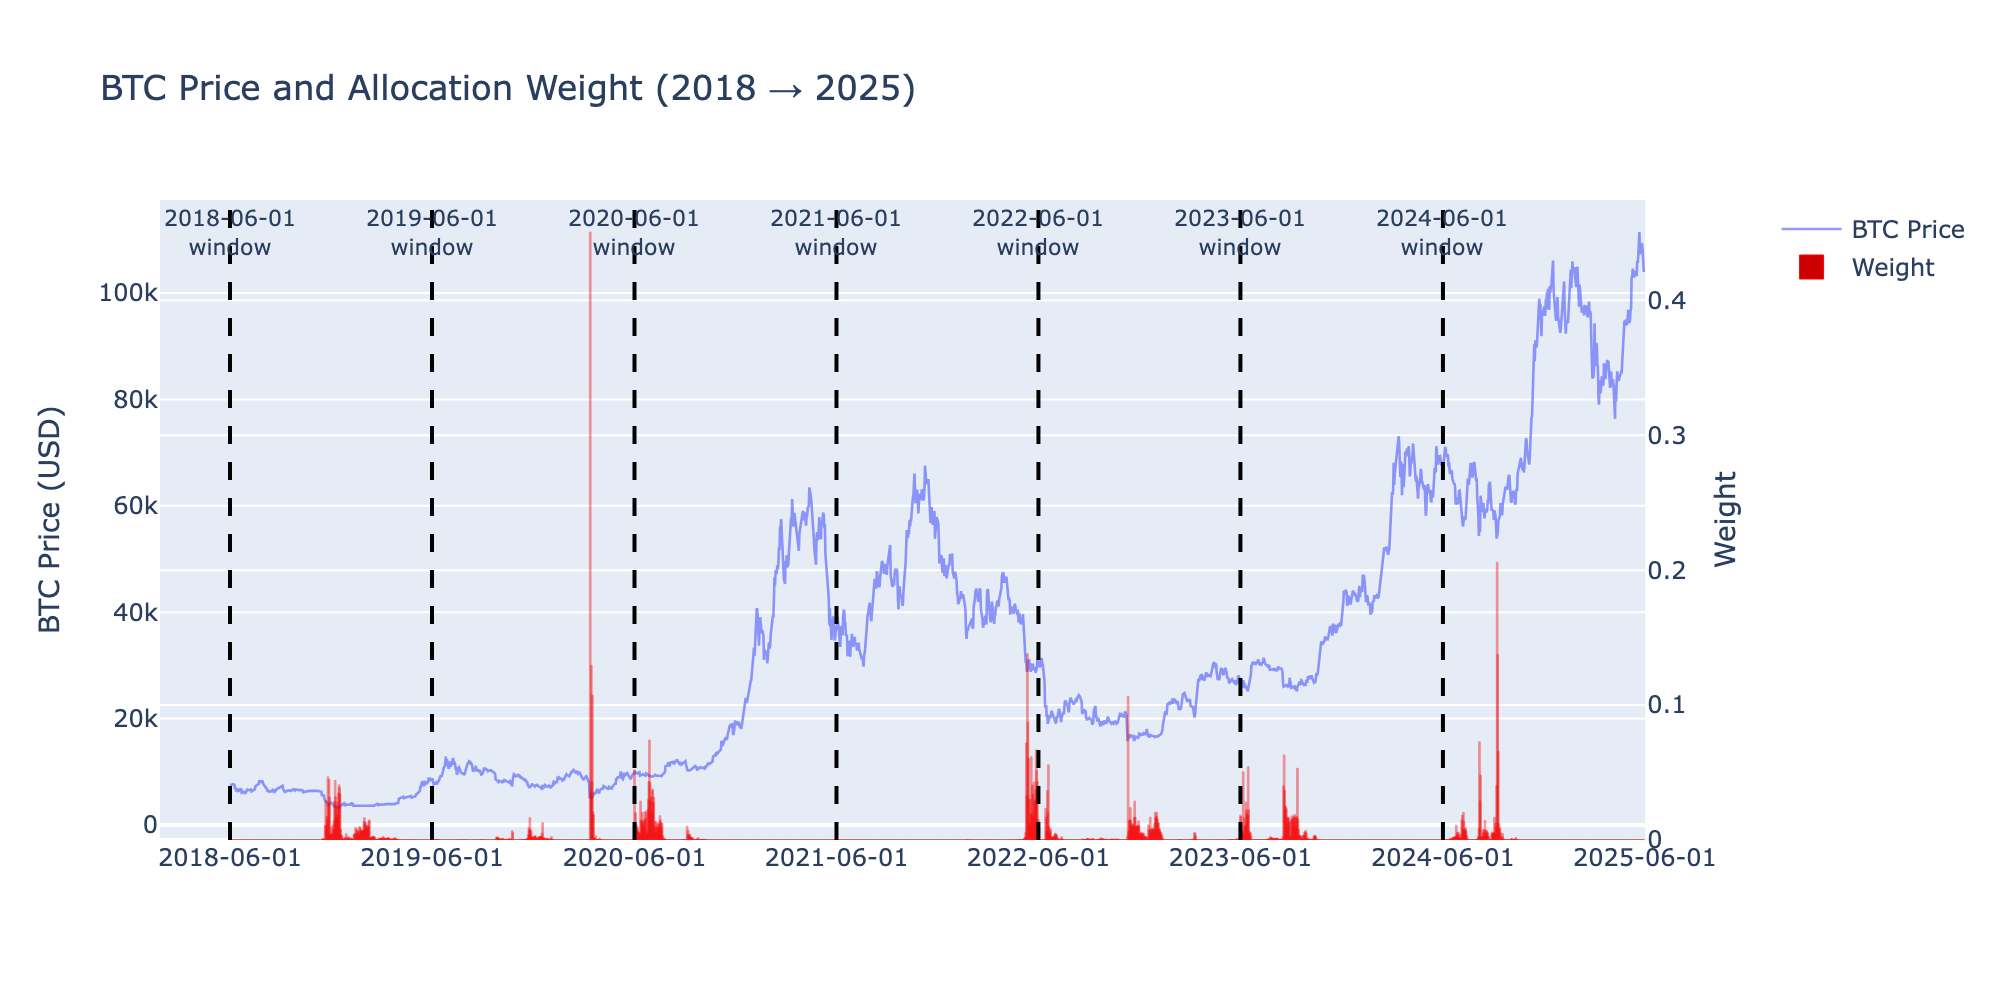

In [24]:
plot_weight_price_across_year(2018, 2025)

---

# 4. Market Understanding Insights  
### Do the dashboard’s market indicators (MA200, MSTR) help investors better understand the market? What additional insights do they provide?

## 4.1 Price vs MA200 – Long-Term Trend Understanding  
- **Question answered:**  
  **What does MA200 show about overall market conditions?**  
- Break down bull/bear cycles visually.

## 4.4 MSTR Purchase Indicator – Institutional Behavior Insight  
- **Question answered:**  
  **What can investors learn from MSTR buying patterns?**  
- Price/MSTR events/SPD overlay.

## 4.5 MSTR Events vs Future Price Performance  
- **Question answered:**  
  **Does MSTR buy low or buy high?  
  Should retail investors pay attention to MSTR behavior?**  
- Short-term event study.

---

# 5. Integrated Insights – What This Dashboard Offers to Investors  
### By integrating all the information in the dashboard, what actionable behaviors and insights can it provide to investors?

## 5.1 Actionable Insights Summary  
- How allocation adjusts intelligently  
- How SPD provides objective buying quality  
- How risk metrics help investors understand drawdowns  
- How sentiment/MSTR provide market context

## 5.2 How Investors Should Use the Dashboard Day-to-Day  

## 5.3 Limitations & Future Improvements  
- The strategy only optimize the performance under 365-window size.
- 不適合用satino ratio，無法看到下行波動
- 目標是搜集最多比特幣：只買不賣
    - return 績效
    - return 風險績效
- No transaction costs  
- MSTR signal is lagging

# 6. Appendix
- how to interpret alpha and beta in dynanic DCA model
- 跨window看搜集績效
- 看return績效